### Impact of Expense Ratios on Long-Term Investment Growth

In this analysis, we compare the performance of different funds and ETFs that track the S&P 500 index over a 20-year period, starting from 2003. The purpose is to illustrate how varying expense ratios can impact long-term investment returns.

#### Funds and ETFs Compared:

1. **SPY (S&P 500 ETF)**: A popular ETF with a relatively low expense ratio.
2. **VFINX (Vanguard 500 Index Fund Investor Shares)**: A mutual fund that also tracks the S&P 500, with a slightly higher expense ratio than SPY.
3. **SXR8 (European Accumulative ETF)**: An ETF available in Europe that accumulates dividends, reinvesting them automatically, and has a low expense ratio.
4. **Expensive Fund**: A hypothetical mutual fund with a high expense ratio, meant to illustrate the detrimental effects of high fees on long-term returns.

#### Methodology:

- We start with an initial investment of $10,000 in each fund/ETF.
- The cumulative returns are adjusted daily for the expense ratio, which simulates the compounding effect of fees over time.
- We plot the investment growth over time to visually compare the impact of different expense ratios.


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  1 of 1 completed


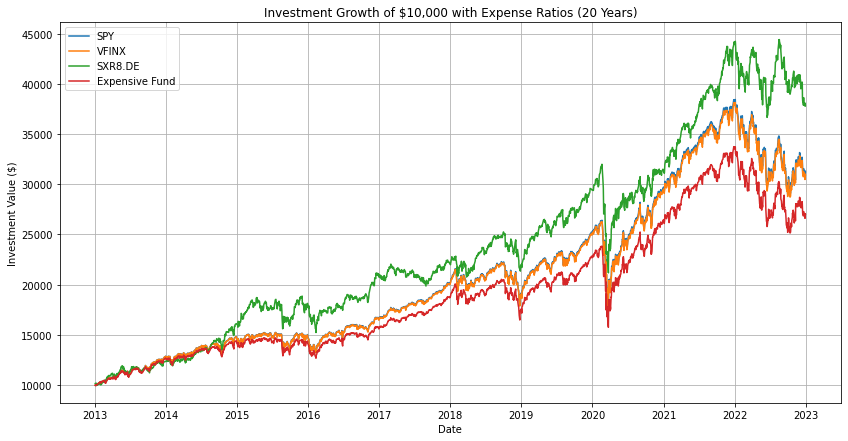

In [7]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical price data for SPY, VFINX, and SXR8
etf_tickers = ['SPY', 'VFINX']
european_accum_ticker = 'SXR8.DE'

etf_data = yf.download(etf_tickers, start='2013-01-01', end='2023-01-01')['Adj Close']
european_data = yf.download(european_accum_ticker, start='2013-01-01', end='2023-01-01')['Adj Close']

# Example expense ratios (in decimal form, i.e., 0.09% = 0.0009)
etf_expense_ratios = {'SPY': 0.0009, 'VFINX': 0.0014}
european_expense_ratio = 0.0007  # SXR8
expensive_fund_expense_ratio = 0.015  # Hypothetical expensive fund

# Calculate cumulative returns with expense ratio adjustment
investment_values = {}
for ticker, data in etf_data.items():
    returns = data.pct_change().dropna()  # Calculate daily returns
    # Adjust returns for expense ratio, assuming daily application
    adjusted_returns = returns - etf_expense_ratios[ticker]/252
    cumulative_returns = (1 + adjusted_returns).cumprod() * 10000
    investment_values[ticker] = cumulative_returns

# Calculate European ETF adjusted for its expense ratio
returns = european_data.pct_change().dropna()
adjusted_returns = returns - european_expense_ratio/252
cumulative_returns = (1 + adjusted_returns).cumprod() * 10000
investment_values[european_accum_ticker] = cumulative_returns

# Adjust hypothetical expensive fund similarly
expensive_fund_returns = etf_data['VFINX'].pct_change().dropna()
adjusted_expensive_returns = expensive_fund_returns - expensive_fund_expense_ratio/252
cumulative_expensive_returns = (1 + adjusted_expensive_returns).cumprod() * 10000
investment_values['Expensive Fund'] = cumulative_expensive_returns

# Plotting the results
plt.figure(figsize=(14, 7))
for ticker, cumulative_returns in investment_values.items():
    plt.plot(cumulative_returns.index, cumulative_returns, label=ticker)

plt.title('Investment Growth of $10,000 with Expense Ratios (10 Years)')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend()
plt.grid(True)
plt.show()



#### Results:

The plot above shows the growth of a $10,000 investment in each of the funds/ETFs over 10 years. As expected, the fund with the highest expense ratio (the Expensive Fund) significantly underperforms the others, demonstrating the importance of choosing investments with lower fees. On the other hand, the European Accumulative ETF (SXR8) shows superior growth due to the accumulation of dividends and its low expense ratio.